## Lab 5 Solving a multi-class classification problem using a FNN (MLP)

Dataset used is the wine dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
It is a classic and very easy multi-class classification.
It have thirteen (13) features and y output which has three types (class labels).

In [ ]:
# Load dataset and import required packages
'''
Task: Import pandas and give an alias as pd so that we can use pd in code for pandas
'''
"Add your code here"

'''
Task: Read a given csv file in the current folder (wine.csv) into a dataframe df using method read_csv() from pd.
      This method takes two parameters: (1) the csv file name with its path and (2) names, which lists the column names,
      such as ['y','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13']
'''
df = "Add your code here"


In [2]:
# Display the dimensions of the dataframe df
print(df.shape)

(178, 14)


In [3]:
# Display the first 5 rows of this dataframe df
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Separate the dataset into input X and output y
X = df.iloc[:,1:]
y = df.iloc[:,0]
y = y - 1  # Decrementing by 1 to make labels start from 0

In [ ]:
# Create the train and test datasets using function train_test_split() and import required package
'''
Task: Import train_test_split from sklearn.model_selection
'''
"Add your code here"


'''
Task: Split the dataset into train and test datasets using method train_test_split() with four parameters:
      (1) X of datasetas,(2) y of dataset, (3) test_size = 0.2 (for 80:20 ratio) and (4) random_state = 42 (Popular integer random seeds are 0 and 42)
'''
X_train, X_test, y_train, y_test = "Add your code here"


In [6]:
print(X_train.values)

[[1.434e+01 1.680e+00 2.700e+00 ... 5.700e-01 1.960e+00 6.600e+02]
 [1.253e+01 5.510e+00 2.640e+00 ... 8.200e-01 1.690e+00 5.150e+02]
 [1.237e+01 1.070e+00 2.100e+00 ... 1.040e+00 2.770e+00 6.600e+02]
 ...
 [1.438e+01 1.870e+00 2.380e+00 ... 1.200e+00 3.000e+00 1.547e+03]
 [1.269e+01 1.530e+00 2.260e+00 ... 9.600e-01 2.060e+00 4.950e+02]
 [1.234e+01 2.450e+00 2.460e+00 ... 8.000e-01 3.380e+00 4.380e+02]]


### Set aside two futureSample dataset


In [7]:
# Create a future sample set from the test dataset
futureSample_data= X_test[-2:]
futureSample_label= y_test[-2:]

In [8]:
# Adjust the test dataset after taking the future sample set
X_test = X_test[:-2]
y_test = y_test[:-2]

### Develop the FNN(MLP) model by training the model using the trainig dataset

In [ ]:
# Set parameters for the FNN
input_dim = X_train.shape[1]
"""
Task: try different number of hidden layers and use different number of neurons in each layer
"""
n_neurons_1 = "Add your code here"
n_neurons_2 = "Add your code here"
n_neurons_3 = "Add your code here"

# One suggestion
n_neurons_1 = 512
n_neurons_2 = 512
n_neurons_3 = 100

output_dim = 3

In [ ]:
# Set up parameters for running the FNN model
"""
Task: try different number of epochs and batchsize  to see the difference of training process
"""
epochNo = "Add your code here"
batchSize = "Add your code here"

# One suggestion
epochNo = 20
batchSize=16

In [11]:
# Construct a FNN model and import required packages
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input

model = tf.keras.Sequential()
model.add(Input(shape=(input_dim,)))
# Note: If you use a number of hidden layer that is different from 3, you need to midify the following three lines of code
model.add(Dense(n_neurons_1,activation='relu'))
model.add(Dense(n_neurons_2,activation='relu'))
model.add(Dense(n_neurons_3,activation='relu'))

model.add(Dense(3, activation=tf.keras.activations.softmax)) # Note. three classes need three output nodes with softmax as the activation function, each output indicates the probability of being in one class

In [12]:
# Display the layers in the newly created NN model
print ('The model layers is {}: '.format(len(model.layers)))

The model layers is 4: 


In [ ]:
# Compile the constructed model
'''
Task: Compile the model using method compile() from the model with the parameters: loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']
'''
"Add your code here"


In [ ]:
# Train the model
'''
Task: Train the model using method fit() from the model with the parameters:X_train, y_train, epochs=epochNo, batch_size=batchSize, verbose=0
'''
"Add your code here"


In [15]:
# Predict the output of the test set using method predict() from the model and determine the class labels using the argmax() method with parameter axis =1 
predictions = model.predict(X_test)
y_preds = predictions.argmax(axis=1)

2/2 [==============================] - 0s 0s/step


In [ ]:
# Evaluate the model using method evaluate() from the model with the test set and verbose being 0,1,2, or 3
'''
Task: Evaluate the model using method evaluate() from the model with the test set and verbose being 0,1,2, or 3
'''
scores = "Add your code here"

print(scores)

In [17]:
# import metrics from sklearn for calculation of evaluation metrics, such as accuracy, precision, recall and f1-score
from sklearn import metrics

In [ ]:
# Calculate accuracy of test set using method accuracy_score()
'''
Task: calcualte accuracy of test set using method accuracy_score() from metrics
'''
accuracy_test = "Add your code here"

print (accuracy_test)

In [ ]:
# Calculate precision of test set using method presion_score() from metrics
'''
Task: Calculate precision of test set using method presion_score() from metrics, with average='weighted'
'''
precision_test = "Add your code here"

print(precision_test)

In [ ]:
# Calculate recall of test set using method recall_score() from metrics with average='weighted'
'''
Task: Calculate recall of test set using method recall_score() from metrics, with average='weighted'
'''
recall_test = "Add your code here"

print(recall_test)

In [ ]:
# Calculate f1 score of test set using method f1_score(), with average='weighted'
'''
Task: Calculate f1 score of test set using method f1_score() from metrics with average='weighted'
'''
f1_score_test = "Add your code here"

print(f1_score_test)

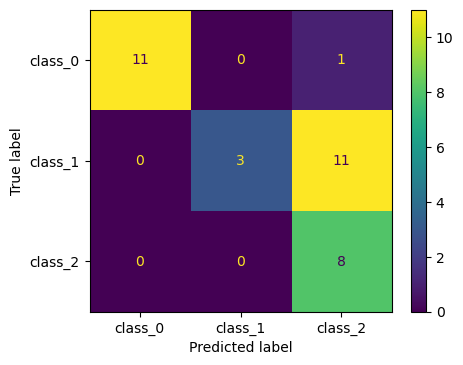

In [22]:
# Display the confusion matrix and import required package
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (5,4), dpi = 100)
cm = confusion_matrix(y_test, y_preds)
cmp = ConfusionMatrixDisplay(cm, display_labels = ['class_0', 'class_1', 'class_2'])
cmp.plot(ax=ax)

In [23]:
# Display the evaluation report
print(metrics.classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      0.21      0.35        14
           2       0.40      1.00      0.57         8

    accuracy                           0.65        34
   macro avg       0.80      0.71      0.63        34
weighted avg       0.86      0.65      0.62        34



In [24]:
from tensorflow.keras.models import load_model

model.save("model.h5")

C:\Users\000516\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Predict the class for the data samples in the future sample set


Use the futureSample_data to simulate a real-world application scenario

In [25]:
loaded_model = load_model ('model.h5')

In [26]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7168      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 100)               51300     
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 321427 (1.23 MB)
Trainable params: 321427 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
print(futureSample_data)

       x1    x2    x3    x4   x5    x6    x7    x8    x9   x10   x11   x12  \
12  13.75  1.73  2.41  16.0   89  2.60  2.76  0.29  1.81  5.60  1.15  2.90   
42  13.88  1.89  2.59  15.0  101  3.25  3.56  0.17  1.70  5.43  0.88  3.56   

     x13  
12  1320  
42  1095  


In [29]:
# Predict the output for the future samples using method predict() from the loaded model, loaded_model
predictions_val = loaded_model.predict(futureSample_data)
y_preds_val = predictions_val.argmax(axis=1)
print("The predicated classes are {} vs the true classes are {}".format(y_preds_val, futureSample_label.values))

1/1 [==============================] - 0s 27ms/step
The predicated classes are [0 0] vs the true classes are [0 0]
